In [1]:
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

In [2]:
%store -r data
data

,is_sofw_dev,full_stack_wd,back_end_wd,front_end_wd,mobile_dev,devops,data_sc,qlty_eng,ux_designer,prod_manager,...,age,debt,employment,youtube,online_resources,inperson_events,podcasts,gender_female,gender_male,gender_other
0,0,0,0,0,0,0,1,0,0,0,...,46,0,-1,0,2,1,0,0,1,0
1,0,1,0,0,0,0,1,0,0,0,...,22,0,0,0,6,0,0,0,1,0
2,0,0,0,0,0,0,1,0,0,0,...,28,1,1,0,2,0,0,0,1,0
3,0,0,0,1,0,0,1,0,0,0,...,22,0,1,0,3,0,1,0,1,0
4,0,0,0,0,0,0,1,0,0,0,...,19,0,1,0,4,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61086,0,0,0,0,0,0,0,0,0,0,...,22,0,0,0,8,0,0,0,1,0
61087,1,0,0,0,0,0,0,0,0,0,...,28,0,0,0,2,0,0,0,1,0
61089,0,0,0,0,0,0,0,0,0,0,...,23,0,0,2,4,1,1,1,0,0
61090,0,0,0,1,1,0,0,0,0,0,...,30,0,-1,0,4,0,0,0,1,0


In [3]:
data.isna().sum()

is_sofw_dev            0
full_stack_wd          0
back_end_wd            0
front_end_wd           0
mobile_dev             0
devops                 0
data_sc                0
qlty_eng               0
ux_designer            0
prod_manager           0
game_dev               0
inf_security           0
data_eng               0
hours_learning_week    0
months_programming     0
attended_bootcamp      0
coding_expenses        0
age                    0
debt                   0
employment             0
youtube                0
online_resources       0
inperson_events        0
podcasts               0
gender_female          0
gender_male            0
gender_other           0
dtype: int64

In [4]:
data = data.drop(columns={'is_sofw_dev'})

In [23]:
# Standardize features
scaler = StandardScaler()
data_std = scaler.fit_transform(data)

# Create k-mean object
n_clusters = 4
cluster = KMeans(n_clusters=n_clusters, random_state=0, n_jobs=-1)

# Train model
model = cluster.fit(data)

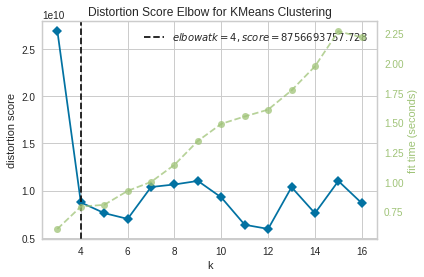

In [6]:
from yellowbrick.cluster import KElbowVisualizer

model = KMeans()
visualizer = KElbowVisualizer(model, k=(3,17))
visualizer.fit(data)
visualizer.poof()

In [24]:
# Silhouette Score
from sklearn.metrics import silhouette_score

preds = cluster.fit_predict(data)
centers = cluster.cluster_centers_

score = silhouette_score (data, preds, metric='euclidean')
print (f"For n_clusters = {n_clusters}, silhouette score is {score})")

## try to plot to see what it looks like

For n_clusters = 4, silhouette score is 0.3618191261038149)


In [8]:
data.columns

Index(['full_stack_wd', 'back_end_wd', 'front_end_wd', 'mobile_dev', 'devops',
       'data_sc', 'qlty_eng', 'ux_designer', 'prod_manager', 'game_dev',
       'inf_security', 'data_eng', 'hours_learning_week', 'months_programming',
       'attended_bootcamp', 'coding_expenses', 'age', 'debt', 'employment',
       'youtube', 'online_resources', 'inperson_events', 'podcasts',
       'gender_female', 'gender_male', 'gender_other'],
      dtype='object')

In [9]:
centers

array([[ 2.63380541e-01,  1.47323892e-01,  2.01765680e-01,
         1.03917602e-01,  4.65330145e-02,  3.66746367e-01,
         2.96119183e-02,  6.76843848e-02,  3.54975170e-02,
         3.58837594e-01,  3.48537797e-01,  3.47986022e-01,
         1.54649623e+01,  2.88437500e+01,  1.90914107e-01,
         2.90998565e+03,  3.07599779e+01,  5.40923303e-01,
         7.01673717e-01,  1.34596285e+00,  4.82324811e+00,
         1.25583962e+00,  7.81864999e-01,  2.04524554e-01,
         7.85543498e-01,  7.17307339e-03],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  1.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         4.00000000e+00, -9.22337204e+18,  0.00000000e+00,
         0.00000000e+00,  1.70000000e+01,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  1.00000000e+00,
         1.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00

In [17]:
pd.set_option('display.max_columns', None)

In [25]:
centroids = pd.DataFrame(centers, columns=[data.columns])
centroids

,full_stack_wd,back_end_wd,front_end_wd,mobile_dev,devops,data_sc,qlty_eng,ux_designer,prod_manager,game_dev,inf_security,data_eng,hours_learning_week,months_programming,attended_bootcamp,coding_expenses,age,debt,employment,youtube,online_resources,inperson_events,podcasts,gender_female,gender_male,gender_other
0,0.178767,0.111757,0.157600,0.098925,0.044527,0.329678,0.029283,0.070959,0.044198,0.326826,0.313007,0.309498,6.787892,6.274622,0.054398,0.034774,28.253674,0.448673,0.703992,1.053850,3.759267,0.794472,0.488923,0.218908,0.771441,0.005484
1,0.081345,0.052708,0.055821,0.042332,0.018884,0.299440,0.009131,0.022826,0.014318,0.291347,0.288442,0.289064,10.485785,34.335132,0.052293,0.051316,27.334924,0.410044,0.824030,1.459846,4.934219,1.095248,0.612368,0.136543,0.855987,0.004980
2,0.248503,0.133234,0.183134,0.104291,0.039421,0.353044,0.018962,0.057635,0.032186,0.364022,0.348802,0.341567,29.098553,9.119511,0.087575,0.052095,27.617016,0.417914,0.551148,1.459331,4.497754,0.997505,0.655439,0.171657,0.819860,0.004741
3,0.027698,0.021927,0.020196,0.014426,0.011541,0.357761,0.005770,0.010387,0.004039,0.347374,0.351414,0.348529,11.233699,72.896134,0.013272,0.046144,28.762839,0.480669,0.905943,1.279862,4.553376,1.177149,0.634737,0.094634,0.899596,0.002885


## second filtering

In [11]:
%store -r data1
data1

,is_sofw_dev,full_stack_wd,back_end_wd,front_end_wd,mobile_dev,devops,data_sc,qlty_eng,ux_designer,prod_manager,...,age,debt,employment,youtube,online_resources,inperson_events,podcasts,gender_female,gender_male,gender_other
7461,0,0,1,0,0,0,1,0,0,0,...,25,0,1,0,2,1,0,0,1,0
45438,0,0,0,0,0,0,0,0,0,0,...,23,1,1,3,6,0,0,0,1,0
29456,0,1,0,0,0,0,0,0,0,0,...,17,0,-1,5,6,0,0,0,1,0
9837,0,0,0,0,0,0,1,0,0,0,...,24,0,1,0,4,1,0,0,1,0
33006,0,1,1,1,1,1,1,0,0,0,...,24,1,0,2,5,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61001,1,0,0,0,0,0,0,0,0,0,...,24,1,0,1,4,0,1,0,1,0
61053,1,0,0,0,0,0,0,0,0,0,...,31,0,1,1,1,1,1,0,1,0
61065,1,0,0,0,0,0,0,0,0,0,...,27,1,1,0,3,0,0,0,1,0
61083,1,0,0,0,0,0,0,0,0,0,...,22,0,1,2,6,0,0,0,1,0


In [12]:
data = data1.drop(columns={'is_sofw_dev'})

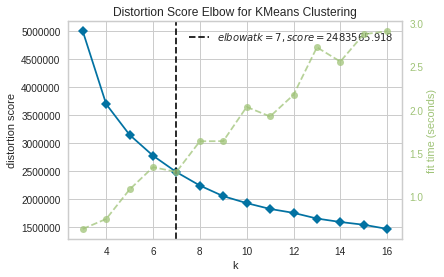

In [13]:
from yellowbrick.cluster import KElbowVisualizer

model = KMeans()
visualizer = KElbowVisualizer(model, k=(3,17))
visualizer.fit(data)
visualizer.poof()

In [14]:
# Standardize features
# Create k-mean object
n_clusters = 7
cluster = KMeans(n_clusters=n_clusters, random_state=0, n_jobs=-1)

# Train model
model = cluster.fit(data)

In [15]:
# Silhouette Score
from sklearn.metrics import silhouette_score

preds = cluster.fit_predict(data)
centers = cluster.cluster_centers_

score = silhouette_score (data, preds, metric='euclidean')
print (f"For n_clusters = {n_clusters}, silhouette score is {score})")

## try to plot to see what it looks like

For n_clusters = 7, silhouette score is 0.29893373756049374)


In [16]:
centroids = pd.DataFrame(centers, columns=[data.columns])
centroids

,full_stack_wd,back_end_wd,front_end_wd,mobile_dev,devops,data_sc,qlty_eng,ux_designer,prod_manager,game_dev,...,age,debt,employment,youtube,online_resources,inperson_events,podcasts,gender_female,gender_male,gender_other
0,0.173389,0.108259,0.152960,0.102322,0.042605,0.320761,0.027589,0.070892,0.042605,0.324079,...,24.797276,0.381526,0.654618,1.062336,3.654095,0.773354,0.451895,0.221931,0.768291,5.063733e-03
1,0.036602,0.027564,0.026661,0.021238,0.011297,0.300497,0.007682,0.014008,0.006326,0.291008,...,27.819702,0.443290,0.886127,1.452779,4.841844,1.158608,0.615002,0.101672,0.890646,4.066878e-03
2,0.219090,0.119154,0.156951,0.095452,0.032671,0.341448,0.021781,0.048046,0.029468,0.348495,...,26.695067,0.377322,0.503523,1.617553,4.667521,1.065343,0.668161,0.155669,0.834721,5.765535e-03
3,0.093705,0.059106,0.067275,0.048054,0.020663,0.312590,0.009851,0.025949,0.016819,0.306103,...,27.087938,0.416867,0.817395,1.418549,4.907016,1.088419,0.611725,0.149207,0.842864,5.766458e-03
4,0.025295,0.021922,0.015177,0.010118,0.015177,0.401349,0.005059,0.010118,0.005059,0.384486,...,29.826307,0.458685,0.897133,1.145025,4.399663,1.195616,0.708263,0.086003,0.913997,1.301043e-17
5,0.185405,0.117522,0.165040,0.091642,0.056428,0.347900,0.036911,0.073398,0.053458,0.328384,...,39.526517,0.647433,0.823080,0.858719,3.729317,0.783623,0.539669,0.245227,0.744591,6.364022e-03
6,0.263622,0.144209,0.201305,0.112561,0.041436,0.355628,0.018597,0.067537,0.034258,0.367047,...,26.439804,0.419902,0.586949,1.396411,4.314192,0.919413,0.621860,0.168679,0.823817,3.915171e-03


In [26]:
%store -r X_new

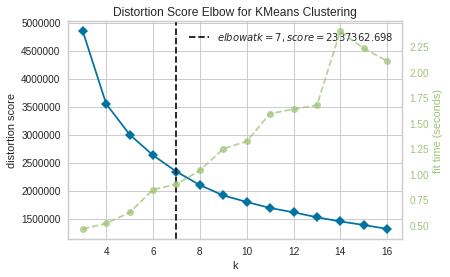

In [27]:
from yellowbrick.cluster import KElbowVisualizer

model = KMeans()
visualizer = KElbowVisualizer(model, k=(3,17))
visualizer.fit(X_new)
visualizer.poof()

In [28]:
# Standardize features
# Create k-mean object
n_clusters = 7
cluster = KMeans(n_clusters=n_clusters, random_state=0, n_jobs=-1)

# Train model
model = cluster.fit(X_new)

In [29]:
# Silhouette Score
from sklearn.metrics import silhouette_score

preds = cluster.fit_predict(X_new)
centers = cluster.cluster_centers_

score = silhouette_score (data, preds, metric='euclidean')
print (f"For n_clusters = {n_clusters}, silhouette score is {score})")

## try to plot to see what it looks like

For n_clusters = 7, silhouette score is 0.29450215764596077)
